### imports

In [2]:
# imports

import io
import glob
import os
import sys
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
import pandas as pd
import seaborn as sns
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# prompt: Access a folder on google drive and import the data locally
from google.colab import drive
drive.mount('/content/drive/')
# helper files
sys.path.append('/content/drive/MyDrive/Final Project UAV/')
from UAV_project_preprocessing_and_visualization_helper_functions_full import *

Mounted at /content/drive/


In [28]:
cd /content/drive/MyDrive/Final Project UAV/

/content/drive/MyDrive/Final Project UAV


### Loading results

In [29]:
all_results_df = pd.DataFrame()
for file in glob.glob('./Features Extraction Results/features_extraction_results*'):
  print(file)
  with open(file, 'rb') as f:
    all_results_df = all_results_df.append(pickle.load(f))

all_results_df.reset_index(drop=True, inplace=True)

./Features Extraction Results/features_extraction_results_01_20_2024, 21:26:14
./Features Extraction Results/features_extraction_results_01_21_2024, 05:43:12
./Features Extraction Results/features_extraction_results_01_21_2024, 06:18:31
./Features Extraction Results/features_extraction_results_01_22_2024, 06:47:07
./Features Extraction Results/features_extraction_results_01_22_2024, 07:28:08
./Features Extraction Results/features_extraction_results_01_22_2024, 07:41:17
./Features Extraction Results/features_extraction_results_01_22_2024, 09:20:06
./Features Extraction Results/features_extraction_results_01_22_2024, 13:18:35
./Features Extraction Results/features_extraction_results_01_22_2024, 13:24:23
./Features Extraction Results/features_extraction_results_01_22_2024, 21:19:19
./Features Extraction Results/features_extraction_results_01_22_2024, 21:36:27
./Features Extraction Results/features_extraction_results_01_24_2024, 07:58:06
./Features Extraction Results/features_extraction_re

In [30]:
results_RF = all_results_df[all_results_df['Model'] == 'RF']
results_XGB = all_results_df[all_results_df['Model'] == 'XGB']

In [6]:
def extract_from_column(df, col, field):
  return df[col].apply(lambda x: x[field])

def features_type(df):
  # extremum = extract_from_column(df, 'Features Config', 'extremum')
  # curve = extract_from_column(df, 'Features Config', 'curve')
  # f = zip(extremum, curve)
  d_map = {
    (True, True): 'all',
    (True, False): 'range dependent',
    (False, True): 'range independent',
    (False, False): 'none'
  }
  return df['Features Config'].apply(lambda x: d_map[(x['extremum'], x['curve'])])


####RF

In [88]:
results_RF

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Training Config
0,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 5, 'model_random_state': 24}","{'airplane': {'precision': 0.9127906976744186,...",0.696281,0.820927,0.747642,0.871414,NaN
1,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 24}","{'airplane': {'precision': 0.9464285714285714,...",0.739072,0.876978,0.796421,0.892718,NaN
2,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9634146341463414,...",0.766969,0.886689,0.816136,0.899991,NaN
3,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 24}","{'airplane': {'precision': 0.975609756097561, ...",0.774619,0.874580,0.815020,0.901053,NaN
4,"01/20/2024, 21:26:14",10,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 5, 'model_random_state': 24}","{'airplane': {'precision': 0.9305555555555556,...",0.728097,0.793929,0.748937,0.881886,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,"01/21/2024, 06:18:31",20,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.84375, 'recall': ...",0.844035,0.866021,0.852412,0.881536,NaN
536,"01/21/2024, 06:18:31",25,[NIR_airplane_20231024-7069_20231024-021810.js...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 5, 'model_random_state': 42}","{'airplane': {'precision': 0.7878787878787878,...",0.791844,0.810647,0.793590,0.892893,NaN
537,"01/21/2024, 06:18:31",25,[NIR_airplane_20231024-7069_20231024-021810.js...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.7878787878787878,...",0.802885,0.847730,0.819182,0.896244,NaN
538,"01/21/2024, 06:18:31",25,[NIR_airplane_20231024-7069_20231024-021810.js...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 42}","{'airplane': {'precision': 0.8, 'recall': 0.84...",0.797189,0.849378,0.819052,0.894696,NaN


In [67]:
max_idx_RF = results_RF.groupby(['Sample Duration','Model'])['UAV f1'].idxmax()
df_max_RF = results_RF.loc[max_idx_RF.values]

In [68]:
#Extracting test reports
df_max_RF['test UAV report'] = extract_from_column(df_max_RF, 'Evaluation Report', 'uav')
df_max_RF['test UAV precision'] = extract_from_column(df_max_RF, 'test UAV report', 'precision')
df_max_RF['test UAV recall'] = extract_from_column(df_max_RF, 'test UAV report', 'recall')
df_max_RF['test UAV f1-score'] = extract_from_column(df_max_RF, 'test UAV report', 'f1-score')

In [69]:
df_max_RF

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Training Config,test UAV report,test UAV precision,test UAV recall,test UAV f1-score
123,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.9810126582278481,...",0.778403,0.884511,0.821581,0.904213,NaN,"{'precision': 0.7534883720930232, 'recall': 0....",0.753488,0.964286,0.845953
47,"01/20/2024, 21:26:14",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 24}","{'airplane': {'precision': 0.9629629629629629,...",0.827140,0.896609,0.856723,0.922019,NaN,"{'precision': 0.8952380952380953, 'recall': 0....",0.895238,0.878505,0.886792
171,"01/20/2024, 21:26:14",15,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8636363636363636,...",0.860131,0.910479,0.883042,0.934616,NaN,"{'precision': 0.6271186440677966, 'recall': 0....",0.627119,0.925000,0.747475
234,"01/21/2024, 05:43:12",20,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': False, 'std': Fa...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9642857142857143,...",0.870085,0.921228,0.892244,0.931636,NaN,"{'precision': 0.7058823529411765, 'recall': 0....",0.705882,0.923077,0.800000
18,"01/20/2024, 21:26:14",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9393939393939394,...",0.894219,0.927373,0.909235,0.949868,NaN,"{'precision': 0.7741935483870968, 'recall': 0....",0.774194,0.941176,0.849558


In [34]:
unified_results = pd.DataFrame()
for file in glob.glob('./Features Extraction Results unified durations/features_extraction_results*'):
  print(file)
  with open(file, 'rb') as f:
    unified_results = unified_results.append(pickle.load(f))

unified_results.reset_index(drop=True, inplace=True)

./Features Extraction Results unified durations/features_extraction_results_02_04_2024, 11:06:41
./Features Extraction Results unified durations/features_extraction_results_02_06_2024, 08:14:55


In [70]:
unified_results_RF = unified_results[unified_results['Model'] == 'RF']
unified_results_XGB = unified_results[unified_results['Model'] == 'XGB']

In [71]:
max_idx = unified_results_RF.groupby(['Sample Duration','Model'])['UAV f1'].idxmax()
u_df_max_RF = unified_results_RF.loc[max_idx.values]
u_df_max_RF['test UAV report'] = extract_from_column(u_df_max_RF, 'Evaluation Report', 'uav')
u_df_max_RF['test UAV precision'] = extract_from_column(u_df_max_RF, 'test UAV report', 'precision')
u_df_max_RF['test UAV recall'] = extract_from_column(u_df_max_RF, 'test UAV report', 'recall')
u_df_max_RF['test UAV f1-score'] = extract_from_column(u_df_max_RF, 'test UAV report', 'f1-score')

In [89]:
u_df_max_RF

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,test UAV report,test UAV precision,test UAV recall,test UAV f1-score,training type
5,"02/04/2024, 11:06:41",5,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8164251207729468,...",0.820987,0.938095,0.870779,0.926327,"{'precision': 0.8577981651376146, 'recall': 0....",0.857798,0.809524,0.832962,unified
6,"02/04/2024, 11:06:41",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8602150537634409,...",0.820987,0.938095,0.870779,0.926327,"{'precision': 0.8547008547008547, 'recall': 0....",0.854701,0.869565,0.862069,unified
7,"02/04/2024, 11:06:41",15,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8703703703703703,...",0.820987,0.938095,0.870779,0.926327,"{'precision': 0.9285714285714286, 'recall': 0....",0.928571,0.866667,0.896552,unified
8,"02/04/2024, 11:06:41",20,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.875, 'recall': 1....",0.820987,0.938095,0.870779,0.926327,"{'precision': 0.9090909090909091, 'recall': 0....",0.909091,0.909091,0.909091,unified
9,"02/04/2024, 11:06:41",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.9259259259259259,...",0.820987,0.938095,0.870779,0.926327,"{'precision': 0.9090909090909091, 'recall': 0....",0.909091,0.952381,0.930233,unified


In [73]:
df_max_RF['training type'] = 'individual'
u_df_max_RF['training type'] = 'unified'

In [74]:
df_max_RF

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Training Config,test UAV report,test UAV precision,test UAV recall,test UAV f1-score,training type
123,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.9810126582278481,...",0.778403,0.884511,0.821581,0.904213,NaN,"{'precision': 0.7534883720930232, 'recall': 0....",0.753488,0.964286,0.845953,individual
47,"01/20/2024, 21:26:14",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 24}","{'airplane': {'precision': 0.9629629629629629,...",0.827140,0.896609,0.856723,0.922019,NaN,"{'precision': 0.8952380952380953, 'recall': 0....",0.895238,0.878505,0.886792,individual
171,"01/20/2024, 21:26:14",15,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8636363636363636,...",0.860131,0.910479,0.883042,0.934616,NaN,"{'precision': 0.6271186440677966, 'recall': 0....",0.627119,0.925000,0.747475,individual
234,"01/21/2024, 05:43:12",20,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': False, 'std': Fa...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9642857142857143,...",0.870085,0.921228,0.892244,0.931636,NaN,"{'precision': 0.7058823529411765, 'recall': 0....",0.705882,0.923077,0.800000,individual
18,"01/20/2024, 21:26:14",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9393939393939394,...",0.894219,0.927373,0.909235,0.949868,NaN,"{'precision': 0.7741935483870968, 'recall': 0....",0.774194,0.941176,0.849558,individual


In [75]:
df = df_max_RF.append(u_df_max_RF)

In [76]:
df

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Training Config,test UAV report,test UAV precision,test UAV recall,test UAV f1-score,training type
123,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.9810126582278481,...",0.778403,0.884511,0.821581,0.904213,NaN,"{'precision': 0.7534883720930232, 'recall': 0....",0.753488,0.964286,0.845953,individual
47,"01/20/2024, 21:26:14",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 24}","{'airplane': {'precision': 0.9629629629629629,...",0.827140,0.896609,0.856723,0.922019,NaN,"{'precision': 0.8952380952380953, 'recall': 0....",0.895238,0.878505,0.886792,individual
171,"01/20/2024, 21:26:14",15,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8636363636363636,...",0.860131,0.910479,0.883042,0.934616,NaN,"{'precision': 0.6271186440677966, 'recall': 0....",0.627119,0.925000,0.747475,individual
234,"01/21/2024, 05:43:12",20,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': False, 'std': Fa...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9642857142857143,...",0.870085,0.921228,0.892244,0.931636,NaN,"{'precision': 0.7058823529411765, 'recall': 0....",0.705882,0.923077,0.800000,individual
18,"01/20/2024, 21:26:14",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9393939393939394,...",0.894219,0.927373,0.909235,0.949868,NaN,"{'precision': 0.7741935483870968, 'recall': 0....",0.774194,0.941176,0.849558,individual
5,"02/04/2024, 11:06:41",5,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8164251207729468,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.8577981651376146, 'recall': 0....",0.857798,0.809524,0.832962,unified
6,"02/04/2024, 11:06:41",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8602150537634409,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.8547008547008547, 'recall': 0....",0.854701,0.869565,0.862069,unified
7,"02/04/2024, 11:06:41",15,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8703703703703703,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.9285714285714286, 'recall': 0....",0.928571,0.866667,0.896552,unified
8,"02/04/2024, 11:06:41",20,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.875, 'recall': 1....",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.9090909090909091, 'recall': 0....",0.909091,0.909091,0.909091,unified
9,"02/04/2024, 11:06:41",25,[NIR_airplane_20

####XGB

In [78]:
max_idx_XGB = results_XGB.groupby(['Sample Duration','Model'])['UAV f1'].idxmax()
df_max_XGB = results_XGB.loc[max_idx_XGB.values]

In [79]:
df_max_XGB['test UAV report'] = extract_from_column(df_max_XGB, 'Evaluation Report', 'uav')
df_max_XGB['test UAV precision'] = extract_from_column(df_max_XGB, 'test UAV report', 'precision')
df_max_XGB['test UAV recall'] = extract_from_column(df_max_XGB, 'test UAV report', 'recall')
df_max_XGB['test UAV f1-score'] = extract_from_column(df_max_XGB, 'test UAV report', 'f1-score')

In [80]:
max_idx = unified_results_XGB.groupby(['Sample Duration','Model'])['UAV f1'].idxmax()
u_df_max_XGB = unified_results_XGB.loc[max_idx.values]
u_df_max_XGB['test UAV report'] = extract_from_column(u_df_max_XGB, 'Evaluation Report', 'uav')
u_df_max_XGB['test UAV precision'] = extract_from_column(u_df_max_XGB, 'test UAV report', 'precision')
u_df_max_XGB['test UAV recall'] = extract_from_column(u_df_max_XGB, 'test UAV report', 'recall')
u_df_max_XGB['test UAV f1-score'] = extract_from_column(u_df_max_XGB, 'test UAV report', 'f1-score')

In [90]:
u_df_max_XGB

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,test UAV report,test UAV precision,test UAV recall,test UAV f1-score,training type
30,"02/06/2024, 08:14:55",5,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.9162011173184358,...",0.898931,0.943452,0.916146,0.952251,"{'precision': 0.9241706161137441, 'recall': 0....",0.924171,0.844156,0.882353,unified
31,"02/06/2024, 08:14:55",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.9195402298850575,...",0.898931,0.943452,0.916146,0.952251,"{'precision': 0.944954128440367, 'recall': 0.8...",0.944954,0.895652,0.919643,unified
32,"02/06/2024, 08:14:55",15,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.9038461538461539,...",0.898931,0.943452,0.916146,0.952251,"{'precision': 0.9710144927536232, 'recall': 0....",0.971014,0.893333,0.930556,unified
33,"02/06/2024, 08:14:55",20,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.9459459459459459,...",0.898931,0.943452,0.916146,0.952251,"{'precision': 0.9795918367346939, 'recall': 0....",0.979592,0.872727,0.923077,unified
34,"02/06/2024, 08:14:55",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",XGB,"{'max_depth': 2, 'model_random_state': 42, 'et...","{'airplane': {'precision': 0.8928571428571429,...",0.898931,0.943452,0.916146,0.952251,"{'precision': 0.9459459459459459, 'recall': 0....",0.945946,0.833333,0.886076,unified


In [82]:
df_max_XGB['training type'] = 'individual'
u_df_max_XGB['training type'] = 'unified'

In [83]:
df = df.append(df_max_XGB)
df = df.append(u_df_max_XGB)

In [87]:
df

,datetime,Sample Duration,Test Files,Split Config,Features Config,Model,Model Config,Evaluation Report,UAV precision,UAV recall,UAV f1,Total f1,Training Config,test UAV report,test UAV precision,test UAV recall,test UAV f1-score,training type
123,"01/20/2024, 21:26:14",5,[NIR_airplane_20230603-534_20230603-010658.jso...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.9810126582278481,...",0.778403,0.884511,0.821581,0.904213,NaN,"{'precision': 0.7534883720930232, 'recall': 0....",0.753488,0.964286,0.845953,individual
47,"01/20/2024, 21:26:14",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 24}","{'airplane': {'precision': 0.9629629629629629,...",0.827140,0.896609,0.856723,0.922019,NaN,"{'precision': 0.8952380952380953, 'recall': 0....",0.895238,0.878505,0.886792,individual
171,"01/20/2024, 21:26:14",15,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': None, 'model_random_state': 42}","{'airplane': {'precision': 0.8636363636363636,...",0.860131,0.910479,0.883042,0.934616,NaN,"{'precision': 0.6271186440677966, 'recall': 0....",0.627119,0.925000,0.747475,individual
234,"01/21/2024, 05:43:12",20,[NIR_airplane_20231023-15264_20231023-183229.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': False, 'std': Fa...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9642857142857143,...",0.870085,0.921228,0.892244,0.931636,NaN,"{'precision': 0.7058823529411765, 'recall': 0....",0.705882,0.923077,0.800000,individual
18,"01/20/2024, 21:26:14",25,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 25, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 10, 'model_random_state': 24}","{'airplane': {'precision': 0.9393939393939394,...",0.894219,0.927373,0.909235,0.949868,NaN,"{'precision': 0.7741935483870968, 'recall': 0....",0.774194,0.941176,0.849558,individual
5,"02/04/2024, 11:06:41",5,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 5, 'overlap_factor': 0.25,...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8164251207729468,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.8577981651376146, 'recall': 0....",0.857798,0.809524,0.832962,unified
6,"02/04/2024, 11:06:41",10,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 10, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8602150537634409,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.8547008547008547, 'recall': 0....",0.854701,0.869565,0.862069,unified
7,"02/04/2024, 11:06:41",15,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 15, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.8703703703703703,...",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.9285714285714286, 'recall': 0....",0.928571,0.866667,0.896552,unified
8,"02/04/2024, 11:06:41",20,[NIR_airplane_20231023-13275_20231023-181630.j...,"{'sample_duration': 20, 'overlap_factor': 0.25...","{'date': 2012024, 'extremum': True, 'std': Tru...",RF,"{'max_depth': 7, 'model_random_state': 42}","{'airplane': {'precision': 0.875, 'recall': 1....",0.820987,0.938095,0.870779,0.926327,NaN,"{'precision': 0.9090909090909091, 'recall': 0....",0.909091,0.909091,0.909091,unified
9,"02/04/2024, 11:06:41",25,[NIR_airplane_20

####PLOTTING

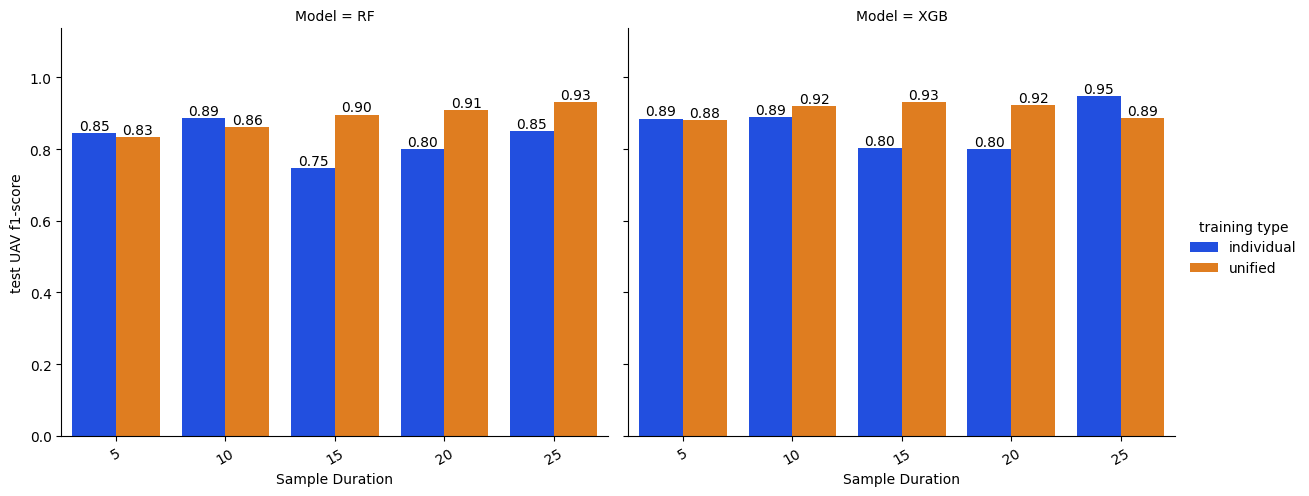

In [85]:
g = sns.catplot(data=df, x = "Sample Duration", y = "test UAV f1-score", hue = "training type", col="Model", kind="bar", aspect=1.2, palette ="bright")

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ['%0.2f' % v for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='edge')
    # plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.margins(y=0.2)

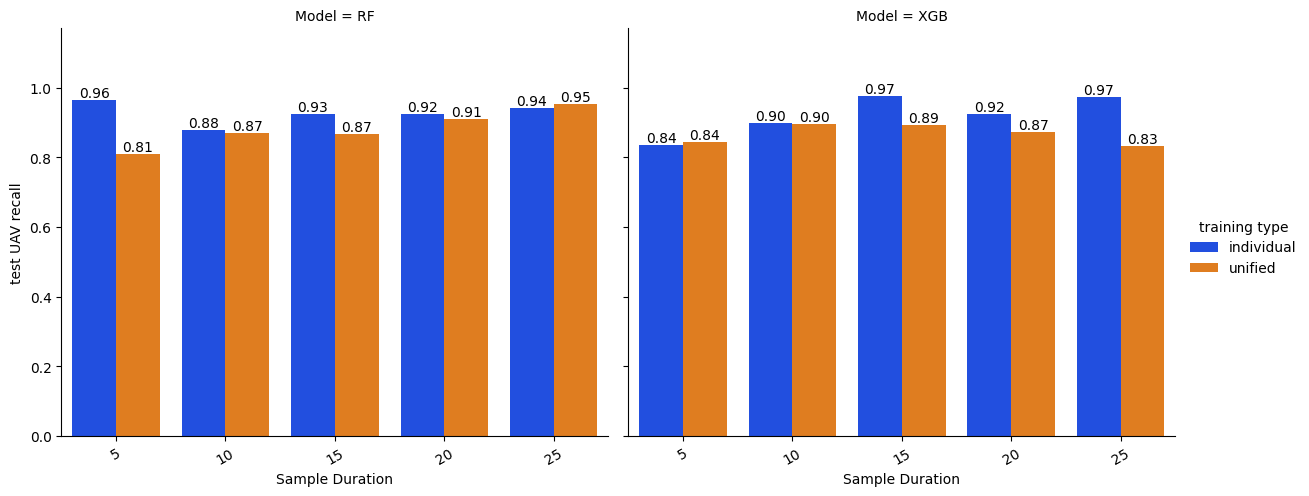

In [86]:
g = sns.catplot(data=df, x = "Sample Duration", y = "test UAV recall", hue = "training type", col="Model", kind="bar", aspect=1.2, palette ="bright")

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ['%0.2f' % v for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='edge')
    # plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.margins(y=0.2)